In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
MovieNums = pd.read_csv('Budget_clean.csv', index_col = [0])

In [3]:
#adding Return on Investment column to normalize data
MovieNums['%ROI'] = MovieNums['Dom_Profits'] / MovieNums['Budget'] 

In [6]:
#Make a sub df of Week and ROI
MovieNumsWKROI = MovieNums[['Week', '%ROI']]
#Grouped by Week and Calculated the ROI
MovieNumsROI_Med = MovieNumsWKROI.groupby('Week').median()
#Sorted the df by Median ROIs
MovieNumsROI_Med.sort_values('%ROI', inplace = True)
#saved the sorted weeks as a list to feed into plot order
WeeksByROI = MovieNumsROI_Med.index.tolist()
#optional to limit limit list to top 25 ROI medians
TrunkWeeksByROI = WeeksByROI[-20::]
TrunkWeeks = sorted(TrunkWeeksByROI)


In [8]:
TrunkWeeksByROI

[29, 50, 25, 28, 30, 9, 21, 46, 6, 52, 44, 36, 26, 45, 20, 31, 22, 27, 40, 18]

In [7]:
TrunkWeeks

[6, 9, 18, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 36, 40, 44, 45, 46, 50, 52]

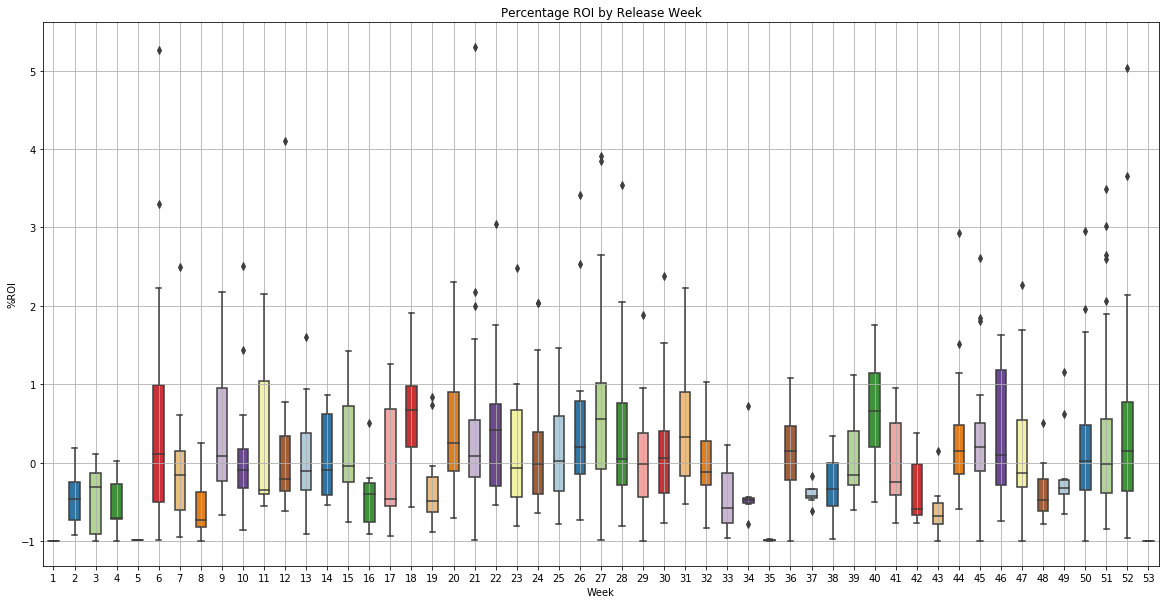

In [15]:
#plot %ROI by weeks
fig= plt.figure(figsize=(20,10))
bplot = sns.boxplot(y='%ROI', x='Week', 
                 data=MovieNums, 
                 width=0.5,
                 palette="Paired")
plt.grid()
plt.title("Percentage ROI by Release Week");


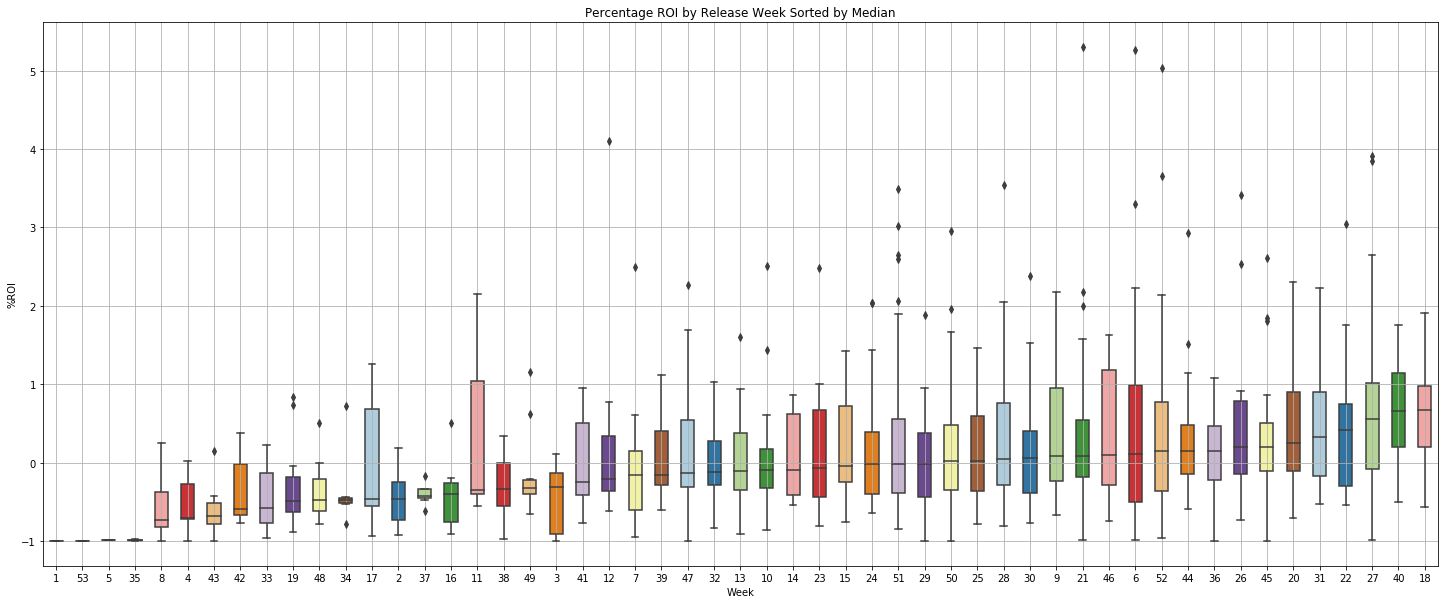

In [16]:
#plot %ROI by weeks sorted by median values
fig= plt.figure(figsize=(25,10))
bplot = sns.boxplot(y='%ROI', x='Week', 
                 data=MovieNums, 
                 width=0.5,
                 palette="Paired", order = WeeksByROI )
plt.grid()
plt.title("Percentage ROI by Release Week Sorted by Median" );

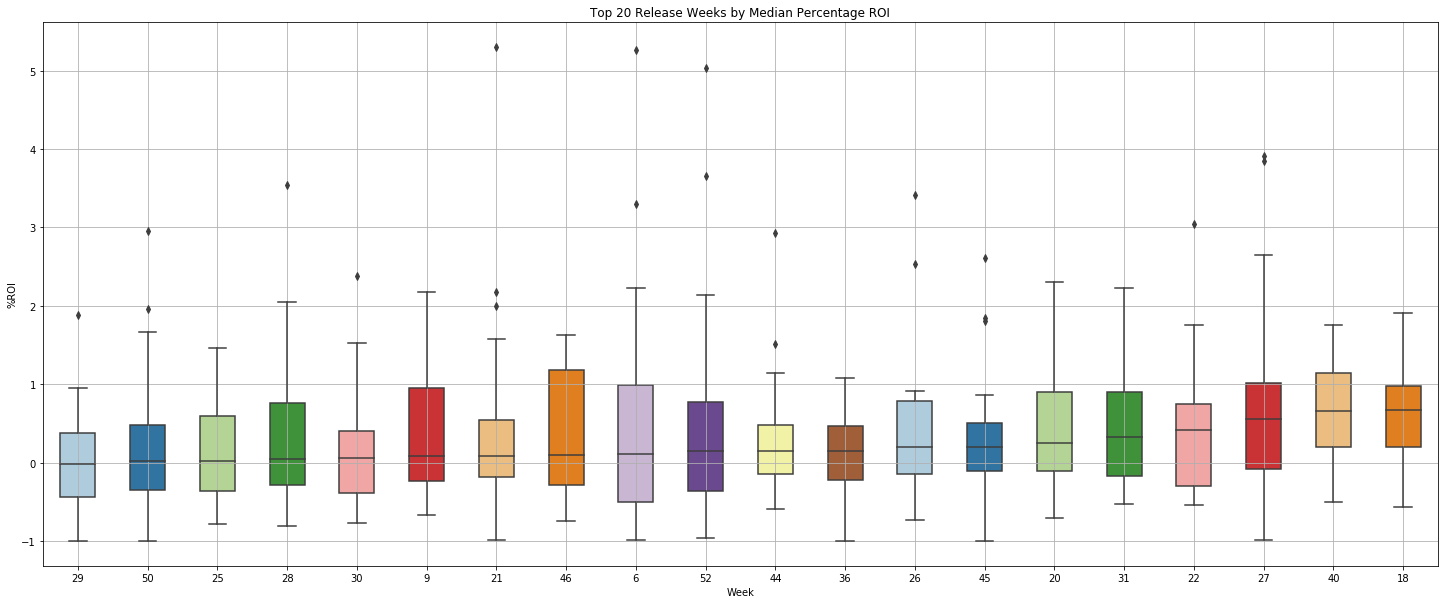

In [17]:
#plot top 20 median ROI values sorted by Median ROI
fig= plt.figure(figsize=(25,10))
bplot = sns.boxplot(y='%ROI', x='Week', 
                 data=MovieNums, 
                 width=0.5,
                 palette="Paired", order = TrunkWeeksByROI )
plt.grid()
plt.title("Top 20 Release Weeks by Median Percentage ROI");

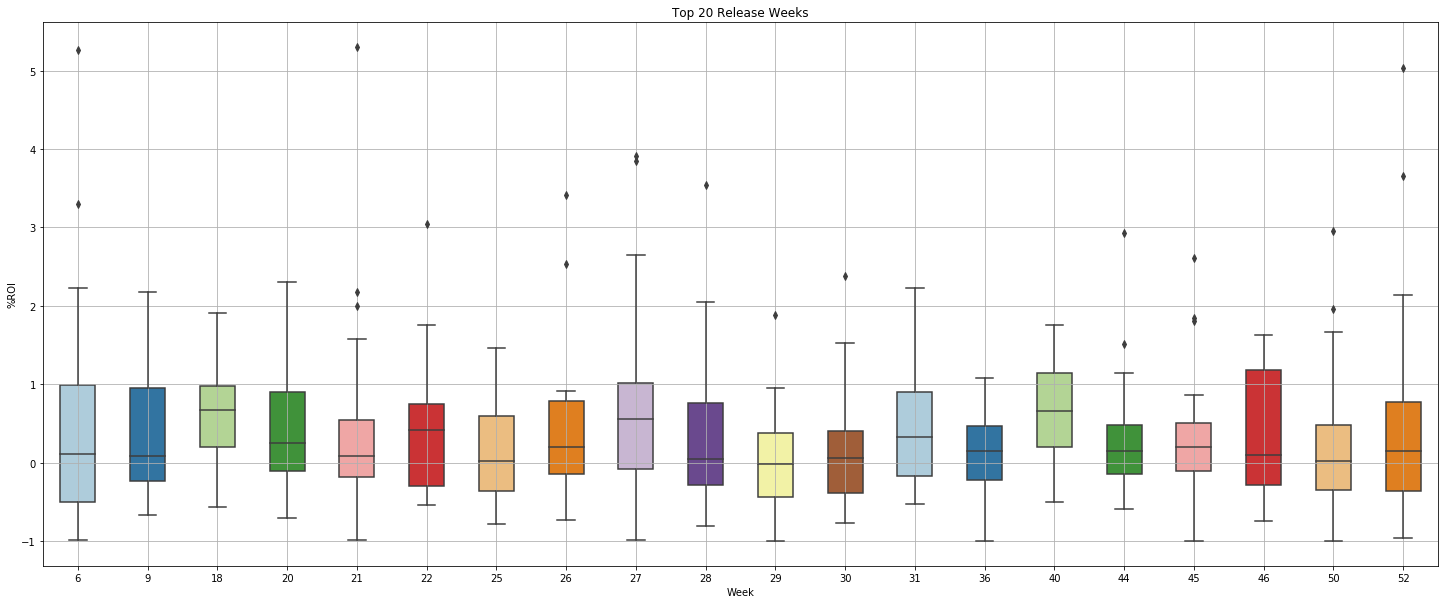

In [18]:
#plot top 20 median ROI values sorted by week
fig= plt.figure(figsize=(25,10))
bplot = sns.boxplot(y='%ROI', x='Week', 
                 data=MovieNums, 
                 width=0.5,
                 palette="Paired", order = TrunkWeeks )
plt.grid()
plt.title("Top 20 Release Weeks");